<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>


## **<center>Linear Regression - Assignment (Solution)</center>**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Post-Profiling Report**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Extraction**](#Section71)<br>
  - **7.2** [**Feature Transformation**](#Section72)<br>
  - **7.3** [**Feature Scaling**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- **Linear Regression** is a machine learning algorithm based on supervised learning.

- It is mostly used for finding out the **relationship** between **features** and **forecasting (or target) variable**.

- This regression technique finds out a **linear relationship** between x (input) and y (output). Hence, the name is **Linear Regression**.

<center><img src="https://images.squarespace-cdn.com/content/v1/51d342a0e4b0290bcc56387d/1373485142303-C9ZH57LUMYUPZ6PNHP41/weights.gif" width=70%></center>


- Linear regression can be denoted by the equation:
<center><h4>$y$= $b0$ + $b1$ * $X$</h4></center>

- So if **salary** is a **linearly dependent** on number of **years of experience**, we can **predict someone's salary** using the equation:

<center><h4>$salary$= $b0$ + $b1$ * $years\_of\_experience$</h4></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- A **Medical Insurance company** can only make money if it collects more than it spends on the medical care of its beneficiaries.

- **Medical costs** are difficult to predict since most money comes from rare conditions of the patients.

- They have hired you - a **data scientist** to **analyze** their previous **data**.

- Your objective is to **train** a **regression** model to accurately **predict** Medical **Charges** and **check the accuracy** of your **model's predictions**.


- Additionally, you have to **find** which **features** have more **impact** on Medical **Charges** and provide information on it.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to **execute** the cell above (3.1) and below (3.2) again after **restarting** the runtime.



In [ ]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('display.float_format', lambda x: '%.5f' % x)                       # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                              # To calculate the R-squared score of a regression model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This data set is being taken from the **cancer.gov and the US Census American Community Survey** for the purpose of **prediction**.


</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1338 | 7 | 55.63 kB |

</br>


|Id|Feature|Description|
|:--|:--|:--|
|01|**age**|  age of primary beneficiary |
|02|**sex**|  insurance contractor gender, female, male |
|03|**bmi**| Body mass index |
|04|**children**|Number of dependents |
|05|**smoker**| Smoking |
|06|**region**| the beneficiary's residential area in the US |
|07|**charges**| Individual medical costs billed by health insurance |



In [ ]:
df = pd.read_csv(filepath_or_buffer="https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%204%20ML1/Module%202%20Linear%20Reg/insurance_new_1_.csv")
print('Data Shape:', df.shape)
df.head()

Data Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19.00000,female,27.90000,0,yes,southwest,16884.92400
1,18.00000,male,33.77000,1,no,southeast,1725.55230
2,28.00000,male,33.00000,3,no,southeast,4449.46200
3,33.00000,male,22.70500,0,no,northwest,21984.47061
4,32.00000,male,28.88000,0,no,northwest,3866.85520


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1333.00000,1338.00000,1338.00000,1338.00000
mean,39.22881,30.66340,1.09492,13270.42227
std,14.07091,6.09819,1.20549,12110.01124
min,18.00000,15.96000,0.00000,1121.87390
25%,26.00000,26.29625,0.00000,4740.28715
50%,39.00000,30.40000,1.00000,9382.03300
75%,51.00000,34.69375,2.00000,16639.91251
max,64.00000,53.13000,5.00000,63770.42801


**Observations**:

- **charges** for some customers can range from as **low** as a **\$1100** dollars to as **high** as **\$63770** dollars.

- The **maximum** of age is found to be **64 years** whereas minimum age is around **18 years**.

- **More than 50%** of the customers have their **BMI** above **30**.

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


**Observations**:

- Out of 16 features, we have **2 int64 datatype** features(age and children), **3 object type** features (sex, smoker and region), and the **rest are of float64** datatype features.

- We may have to **convert some variables** like region into numeric form so we can use them for training purposes.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# profile = ProfileReport(df=df)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations**:

- The report shows **7** features with **1338** observations.

- There are 3 **categorical** and 4 **numeric** features.

- There is an almost even distribution between **male** and **female**.

- Charges has a high correlation with **smoker** and **age**.

- 5 **cells** have **missing** information. All of them are from our age variable.

- We will have to **deal with missing values** present in the dataset.

#### **Performing Operations**


---
**<h4>Question 1:** Create a function that **imputes** the missing value replacing with "**median**" values.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `.fillna(df[col])`.

</details>

In [ ]:
def impute_missing(data=None):
  df['age'] = df['age'].fillna(df['age'].median())
  return df.isna().sum()

In [ ]:
print(df.shape)
impute_missing(data=df)
print(df.shape)

(1338, 7)
(1338, 7)



---
**<h4>Question 2:** Create a function that performs **dummification** of 'sex','smoker', 'region' features and replaces the original feature with its **dummy features**. </h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `.get_dummies` to dummify 'sex','smoker', 'region' feature.

- Keep `drop_first=True` parameter.

</details>

In [ ]:
def dummy_df_creator(data=None):
  # Create a dummy variables
  dummies = pd.get_dummies(data=data, columns=['sex','smoker', 'region'], drop_first=True)

  # Return the dummy variable
  return dummies

In [ ]:
df_dummy_v = dummy_df_creator(data=df)
df_dummy_v.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00000,27.90000,0,16884.92400,0,1,0,0,1
1,18.00000,33.77000,1,1725.55230,1,0,0,1,0
2,28.00000,33.00000,3,4449.46200,1,0,0,1,0
3,33.00000,22.70500,0,21984.47061,1,0,1,0,0
4,32.00000,28.88000,0,3866.85520,1,0,1,0,0


---
**<h4>Question 3:** Create a function that **drops** the below mentioned variables which will not help in **prediction** of charges or have high **correlation** with other features.</h4>

---

``` ['sex_male'] ```


<details>

**<summary>Hint:</summary>**

- You can use `.drop` to drop the given features with axis=1.

</details>

In [ ]:
def drop_vars(data=None):
  # Drop the mentioned columns
  df_drop = data.drop(data[['sex_male']], axis=1)

  # Return the modified dataframe
  return df_drop

In [ ]:
df_dummy = drop_vars(data=df_dummy_v)
df_dummy.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00000,27.90000,0,16884.92400,1,0,0,1
1,18.00000,33.77000,1,1725.55230,0,0,1,0
2,28.00000,33.00000,3,4449.46200,0,0,1,0
3,33.00000,22.70500,0,21984.47061,0,1,0,0
4,32.00000,28.88000,0,3866.85520,0,1,0,0



---
**<h4>Question 4:** Create a function to calculates the **inter quantile range** and then drops off the values outside **5th** to **95th** quantile values.</h4>

---

<details>

**<summary>Hint:</summary>**

- Calculate Q1 and Q3 using `.quantile` method of a dataframe.

- Calculate the IQR using Q1 and Q3.

- Remove the rows which have values **<Q1-1.5*0IQR** or **>Q3+1.5*IQR** in their respective columns.

</details>

In [ ]:
def iqr_checker(data=None):
  # Calculate Q1 and Q3 as 5th and 95th percentile
  Q1 = data.quantile(0.05)
  Q3 = data.quantile(0.95)

  # Calculate the IQR
  IQR = Q3 - Q1

  # Filter out the values outside of the IQR
  df_out = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

  # Return the reduced dataframe
  return df_out

In [ ]:
df_dummy = iqr_checker(data=df_dummy)
df_dummy.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00000,27.90000,0,16884.92400,1,0,0,1
1,18.00000,33.77000,1,1725.55230,0,0,1,0
2,28.00000,33.00000,3,4449.46200,0,0,1,0
3,33.00000,22.70500,0,21984.47061,0,1,0,0
4,32.00000,28.88000,0,3866.85520,0,1,0,0


In [ ]:
df_dummy.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00000,27.90000,0,16884.92400,1,0,0,1
1,18.00000,33.77000,1,1725.55230,0,0,1,0
2,28.00000,33.00000,3,4449.46200,0,0,1,0
3,33.00000,22.70500,0,21984.47061,0,1,0,0
4,32.00000,28.88000,0,3866.85520,0,1,0,0


<a name = Section52></a>
### **5.2 Post Profiling Report**

In [ ]:
# profile = ProfileReport(df=df)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations**:

- After pre-processing our data, we have **1338 observations** with **8 features** (**4 categorical + 4 numeric**)

- There are **no missing values** present in the dataset.

- We have our **new** binary dummy **features** as **smoker_yes,	region_northwest,	region_southeast,	region_southwest** with unique **values as 0 or 1**.

- There is no **high correlation** among the features..

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---


---
**<h4>Question 5:** Create a **function** that compares the **distribution** of the **gender**.</h4>

---

<details>

**<summary>Hint:</summary>**

- Plot a 15x7 inches figure

- Plot a **pieplot** for `sex`feature.

- Add additional cosmetics like **grid** and **title** to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [ ]:
def count_children():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))
  # Plot a pieplot for children features.
  df['children'].value_counts().plot(kind='pie', cmap='Spectral')
  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.xlabel(xlabel='count of children', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Number of children', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

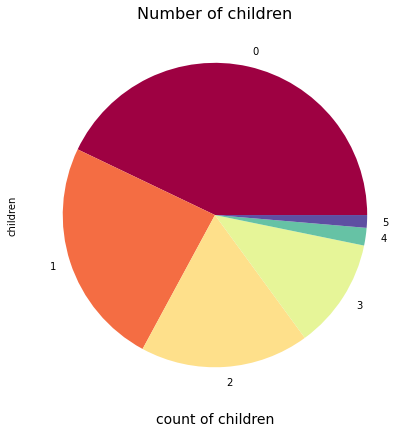

In [ ]:
count_children()

**Observations:**




---
**<h4>Question 6:** Create a **function** that checks the **distribution** of the **dependent** feature.

---

<details>

**<summary>Hint:</summary>**

- Plot a **10x7** inches figure

- Plot a **distplot/histplot** for the `charges` variable.

- Add additional cosmetics like grid and title to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [ ]:
def plot_target():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a dist plot on charges using sns.distplot
  sns.distplot(x = (df_dummy['charges']))

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.xlabel(xlabel='Charges', size=14)
  plt.ylabel(ylabel='Customers', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Charges', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

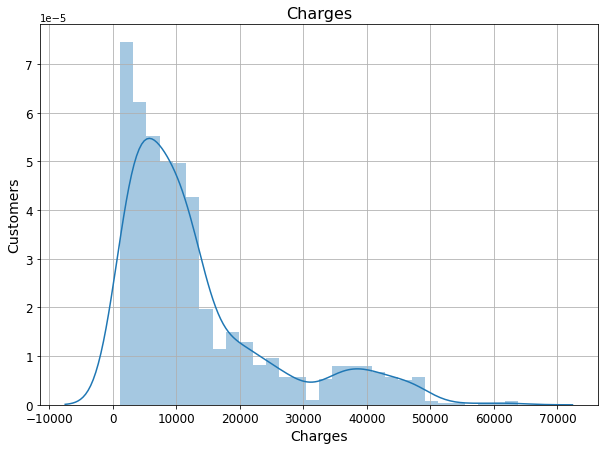

In [ ]:
plot_target()

**Observations:**



---
**<h4>Question 7:** Create a **function** that plots the different types of **region** from where the customers are coming from.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use the original dataframe with **imputed** values.

- Plot a 10x7 inches figure

- Plot a **bar plot** for the `region` variable displaying different regions.

- Add additional cosmetics like grid and title to the plot.

- Set x, y **labels** of size 14, ticks of size 12 and title label of size 16.

</details>

In [ ]:
def region_count():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a horizontal bar plot for region.
  df['region'].value_counts().plot(kind='bar', cmap='jet_r')

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.ylabel(ylabel='customers', size=14)
  plt.xlabel(xlabel='region', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='region with highest number of customers', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

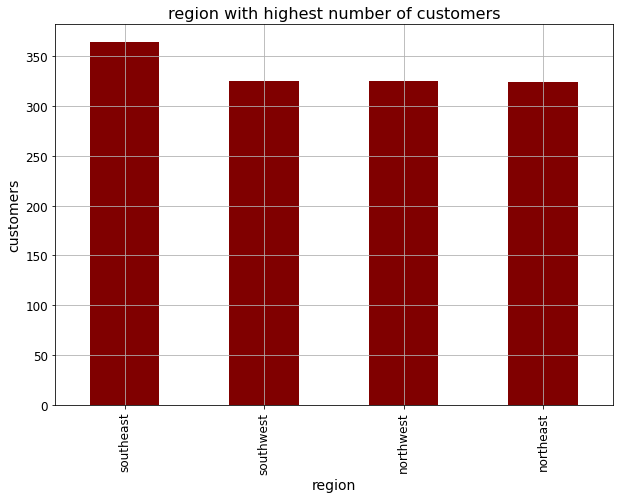

In [ ]:
region_count()

**Observations:**




---
**<h4>Question 8:** Create a **function** that compares the **bmi** and **charges** of medical bills.</h4>

---

<details>

**<summary>Hint:</summary>**

- Plot a 10x7 **inches** figure

- Plot a **scatter plot** using `sns.scatterplot` between `bmi` and `charges` features.

- Add additional cosmetics like **grid** and **title** to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [ ]:
def bmi_v_charges():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a regression plot using sns.scatterplot between bmi and charges features.
  sns.scatterplot(data=df_dummy, x='bmi', y='charges')

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.ylabel(ylabel='bmi', size=14)
  plt.xlabel(xlabel='charges', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='bmi vs charges', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

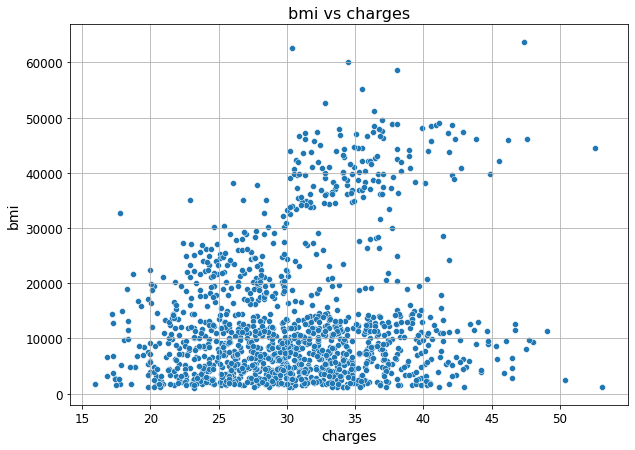

In [ ]:
bmi_v_charges()

**Observations:**


<a name = Section7></a>

---
# **7. Data Post-Processing**
---

In [ ]:
df_dummy.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00000,27.90000,0,16884.92400,1,0,0,1
1,18.00000,33.77000,1,1725.55230,0,0,1,0
2,28.00000,33.00000,3,4449.46200,0,0,1,0
3,33.00000,22.70500,0,21984.47061,0,1,0,0
4,32.00000,28.88000,0,3866.85520,0,1,0,0


<a name = Section71></a>
### **7.1 Feature Extraction**

- In this section, we will **select** some of the features that will be used for **model development**.


---
**<h4>Question 9:** Create a function that selects the following columns for the model development phase.

- Features: `['age'	'bmi'	'children'	'charges'	'smoker_yes'	'region_northwest'	'region_southeast'	'region_southwest']`</h4>

---

<details>

**<summary>Hint:</summary>**

- Simply **select** the features given and return them in a **new** **dataframe**.

</details>

In [ ]:
def feature_extract(data=None):
  df = data[['age','bmi','children','charges','smoker_yes','region_northwest','region_southeast','region_southwest']]
  return df

In [ ]:
df = feature_extract(data=df_dummy)
df.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00000,27.90000,0,16884.92400,1,0,0,1
1,18.00000,33.77000,1,1725.55230,0,0,1,0
2,28.00000,33.00000,3,4449.46200,0,0,1,0
3,33.00000,22.70500,0,21984.47061,0,1,0,0
4,32.00000,28.88000,0,3866.85520,0,1,0,0


<a name = Section72></a>
### **7.2 Feature Transformation**

- In this section, we will apply **transformations** to some features.


---
**<h4>Question 10:** Create a function that **applies** log **transformation** on the given features.</h4>

---

- Feature: `charges` - log(1+x)


<details>

**<summary>Hint:</summary>**

- **log(1+x) transformation** can be applied using `np.log1p()` method.

- **log(x) transformation** can be applied using `np.log()` method.

</details>

In [ ]:
def transform_features(df=None):
  df['charges'] = np.log1p(df['charges'])
  return df

In [ ]:
df = transform_features(df=df)
df.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.00000,27.90000,0,9.73424,1,0,0,1
1,18.00000,33.77000,1,7.45388,0,0,1,0
2,28.00000,33.00000,3,8.40076,0,0,1,0
3,33.00000,22.70500,0,9.99814,0,1,0,0
4,32.00000,28.88000,0,8.26046,0,1,0,0


<a name = Section73></a>
### **7.3 Feature Scaling**

- In this section, we will perform **standard scaling** over the selected features.


---
**<h4>Question 11:** Create a function that **scales** the **features** of dataframe using a **standard** scaler.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a scaler using StandardScaler()

- Fit and transform dataframe using `.fit_transform()` method of the **StandardScaler**.

- Create a new dataframe using output of scaled dataframe and column names of the input dataframe.

</details>

In [ ]:
def scale_data(data=None):
  sc = StandardScaler()
  scaled_data = sc.fit_transform(data)
  scaled_dataframe = pd.DataFrame(data=scaled_data, columns=data.columns)
  return scaled_dataframe

In [ ]:
scaled_data = scale_data(data=df)
scaled_data.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.44081,-0.45332,-0.90861,0.69139,1.97059,-0.56642,-0.61132,1.76548
1,-1.51203,0.50962,-0.07877,-1.78986,-0.50746,-0.56642,1.63579,-0.56642
2,-0.79975,0.38331,1.58093,-0.75956,-0.50746,-0.56642,1.63579,-0.56642
3,-0.44361,-1.30553,-0.90861,0.97854,-0.50746,1.76548,-0.61132,-0.56642
4,-0.51484,-0.29256,-0.90861,-0.91223,-0.50746,1.76548,-0.61132,-0.56642


---
**<h4>Question 12:** Create a **function** that creates two dataframes for **dependent and independent features**.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create input dataframe X by dropping only "Sales_in_thousands" feature from axis 1.

- Create target series by using "Sales_in_thousands" as value.

</details>


In [ ]:
def seperate_Xy(data=None):
  X = data.drop(labels=['charges'], axis=1)
  y = data['charges']
  return X, y

In [ ]:
X, y = seperate_Xy(data=scaled_data)
X.head()

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.44081,-0.45332,-0.90861,1.97059,-0.56642,-0.61132,1.76548
1,-1.51203,0.50962,-0.07877,-0.50746,-0.56642,1.63579,-0.56642
2,-0.79975,0.38331,1.58093,-0.50746,-0.56642,1.63579,-0.56642
3,-0.44361,-1.30553,-0.90861,-0.50746,1.76548,-0.61132,-0.56642
4,-0.51484,-0.29256,-0.90861,-0.50746,1.76548,-0.61132,-0.56642


<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

---
**<h4>Question 13:** Create a **function** that splits the data into **train** and **test** datasets while keeping **random state as 42**.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `train_test_split()` to split the dataset.

- Use `test_size` of **0.25**

- Use `random_state` equal to **42**.

</details>

In [ ]:
def Xy_splitter(X=None, y=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

  print('Training Data Shape:', X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = Xy_splitter(X=X, y=y)

Training Data Shape: (1003, 7) (1003,)
Testing Data Shape: (335, 7) (335,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this **section** we will develop a **Linear Regression** model, check it's **performance** using various performance **metrics**.

---
**<h4>Question 14:** Create a function that instantiates a Linear Regression model.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a Linear Regression model using LinearRegression().

</details>

In [ ]:
def model_generator_lr():
  return LinearRegression()

In [ ]:
regression = model_generator_lr()

---
**<h4>Question 15:** Create a function that **fits** the model on **train set** and evaluates it on test set using **various metrics**.</h4>

---

<details>

**<summary>Hint:</summary>**

- `Fit` the model on training set.
- `Predict` the values on the train set and the test set.
- Evaluate the scores using the `mean_absolute_error`, `mean_squared_error`, `root_mean_squared_error`, `r2_score`, and `adjusted_r2_score` on the train set and the test set.

</details>

In [ ]:
def train_n_eval(model=None):

  # Extracting regression name
  model_name = type(regression).__name__

  # Fit the regression on train data
  regression.fit(X_train, y_train)

  # Make predictions using test data
  y_pred = regression.predict(X_test)

    # Make predictions using test data
  y_pred_train = regression.predict(X_train)

  # Calculate test accuracy of the regression
  model_r2 = r2_score(y_test, y_pred)

  # Calculate train accuracy of the regression
  model_r2_train = r2_score(y_train, y_pred_train)

  # Display the accuracy of the regression
  print('Performance Metrics for', model_name, ':')
  print('[R2-Score Train]:', model_r2_train)
  print('[R2-Score Test]:', model_r2)

In [ ]:
train_n_eval(model=regression)

Performance Metrics for LinearRegression :
[R2-Score Train]: 0.7624730801268353
[R2-Score Test]: 0.7771332777907713


**Observations:**

- We can see that our **R-squared score** is around **0.77**.

- We have a **good R2 score** but there is always room for improvement.

- This can be improved by trying **different combination** of **features** that give the **best values** for **R-squared** and **Adjusted R-squared** scores.

**<h4>NOTE:**</h4>

- You may try different combinations of features that affect the target variable's prediction.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We have **analyzed** and understood the **different features** that can **influence** the **Charges** of the **Medical insurance**.

- **smoker** and **agee** plays an important role in **determining** the **Charge** of the Medical bills.

- We have also built a **predictor** to **estimate** the **Charge** based on those **influential features**.

- The model **performs decently** as shown by our **evaluation metrics**.

- This can help the **Insurance company** to **improve** their overall **profits**.

- Since the data is less, **getting more records** can **improve** the model's **performance**.

- We can also use other **regression** techniques and **compare** them with our trained model.